# Laboratory 2 - Data Exploration
#### 26th June 2022

## Multiple Linear regression

---

# Import Libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max.columns', None)

# Data loading and overview

In [2]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


# EDA

## Distplot

We look at the distribution

<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

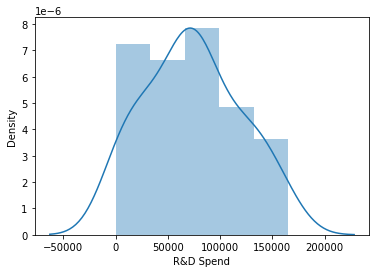

In [4]:
sns.distplot(df['R&D Spend'])

<AxesSubplot:xlabel='Administration', ylabel='Density'>

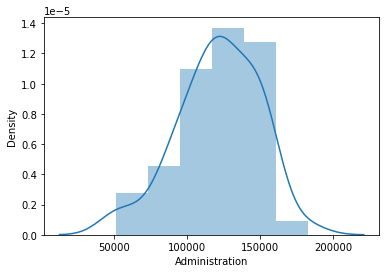

In [5]:
sns.distplot(df['Administration'])

<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

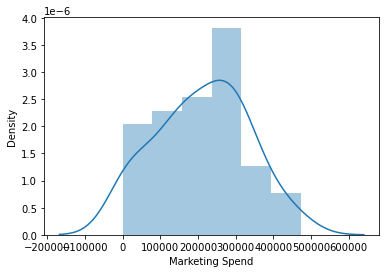

In [6]:
sns.distplot(df['Marketing Spend'])

<AxesSubplot:xlabel='Profit', ylabel='Density'>

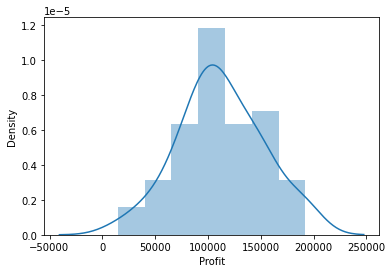

In [7]:
sns.distplot(df['Profit'])

Feature distribution is not normal

## Barplot

<AxesSubplot:xlabel='State', ylabel='R&D Spend'>

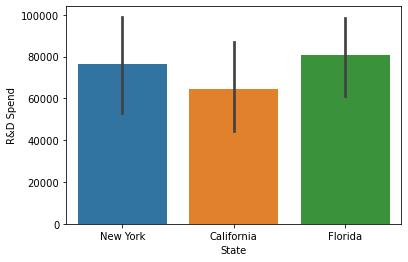

In [8]:
sns.barplot(x = 'State', y = 'R&D Spend', data = df)

<AxesSubplot:xlabel='State', ylabel='Administration'>

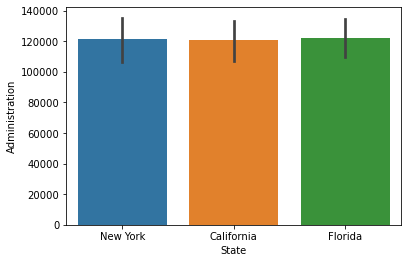

In [9]:
sns.barplot(x = 'State', y = 'Administration', data = df)

<AxesSubplot:xlabel='State', ylabel='Profit'>

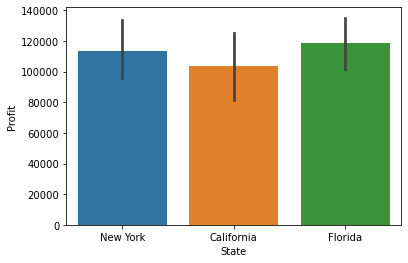

In [10]:
sns.barplot(x = 'State', y = 'Profit', data = df)

## Countplot

<AxesSubplot:xlabel='State', ylabel='count'>

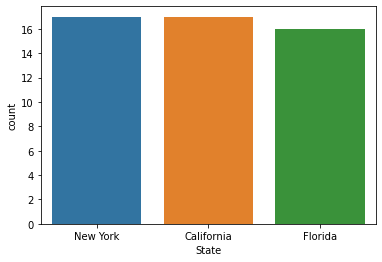

In [11]:
sns.countplot(x = 'State', data = df)

## Boxplot

We look at outliers

<AxesSubplot:xlabel='R&D Spend'>

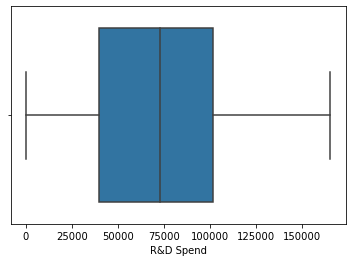

In [12]:
sns.boxplot(x = 'R&D Spend', data = df)

<AxesSubplot:xlabel='Administration'>

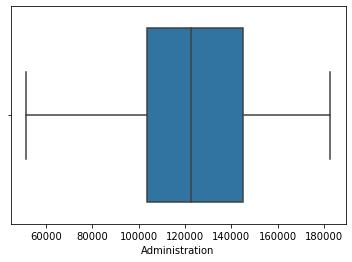

In [13]:
sns.boxplot(x = 'Administration', data = df)

<AxesSubplot:xlabel='Marketing Spend'>

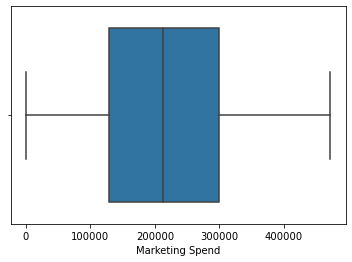

In [14]:
sns.boxplot(x = 'Marketing Spend', data = df)

<AxesSubplot:xlabel='Profit'>

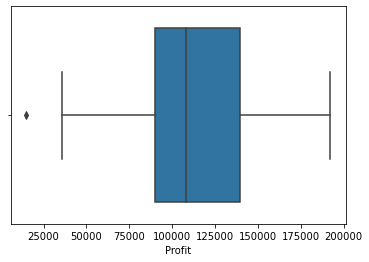

In [15]:
sns.boxplot(x = 'Profit', data = df)

<AxesSubplot:xlabel='State', ylabel='R&D Spend'>

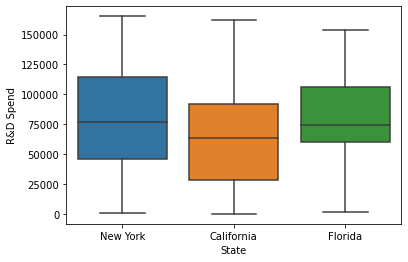

In [16]:
sns.boxplot(x = 'State', y = 'R&D Spend', data = df)

<AxesSubplot:xlabel='State', ylabel='Administration'>

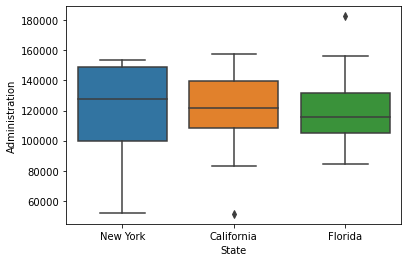

In [17]:
sns.boxplot(x = 'State', y = 'Administration', data = df)

<AxesSubplot:xlabel='State', ylabel='Marketing Spend'>

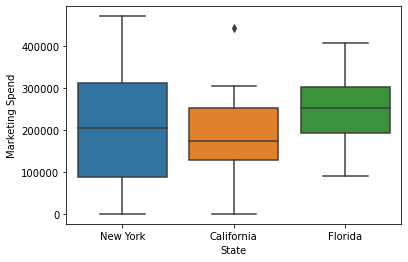

In [18]:
sns.boxplot(x = 'State', y = 'Marketing Spend', data = df)

<AxesSubplot:xlabel='State', ylabel='Profit'>

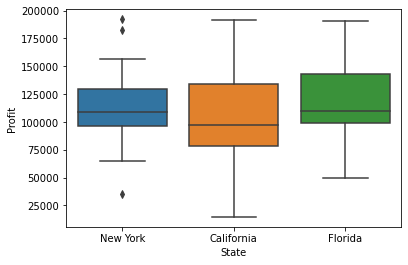

In [19]:
sns.boxplot(x = 'State', y = 'Profit', data = df)

In [20]:
# profit statistics for each state
df[['Profit', 'State']].groupby('State').describe().T

State            California        Florida       New York
Profit count      17.000000      16.000000      17.000000
       mean   103905.175294  118774.024375  113756.446471
       std     44446.359357   35605.470428   41140.258117
       min     14681.400000   49490.750000   35673.410000
       25%     78239.910000   99147.922500   96479.510000
       50%     97427.840000  109543.120000  108552.040000
       75%    134307.350000  142719.627500  129917.040000
       max    191792.060000  191050.390000  192261.830000

## Striplot

Feature scattering

<AxesSubplot:xlabel='State', ylabel='R&D Spend'>

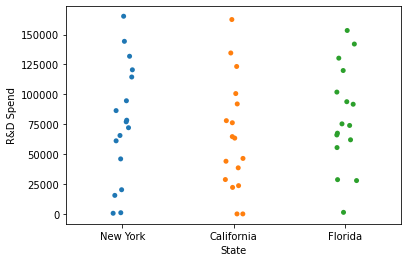

In [21]:
sns.stripplot(x ='State', y= 'R&D Spend', data = df)

<AxesSubplot:xlabel='State', ylabel='Administration'>

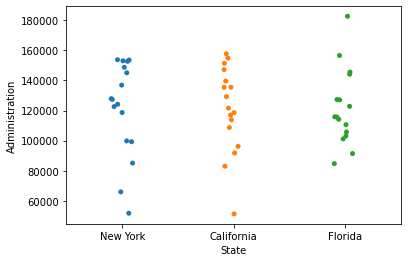

In [22]:
sns.stripplot(x ='State', y= 'Administration', data = df)

<AxesSubplot:xlabel='State', ylabel='Marketing Spend'>

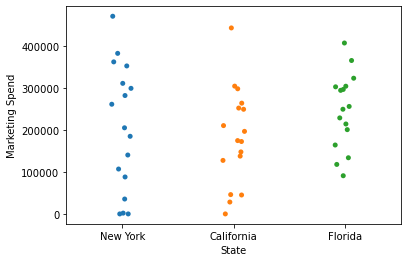

In [23]:
sns.stripplot(x ='State', y= 'Marketing Spend', data = df)

<AxesSubplot:xlabel='State', ylabel='Profit'>

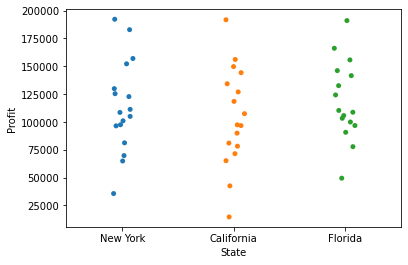

In [24]:
sns.stripplot(x ='State', y= 'Profit', data = df)

## Matrix

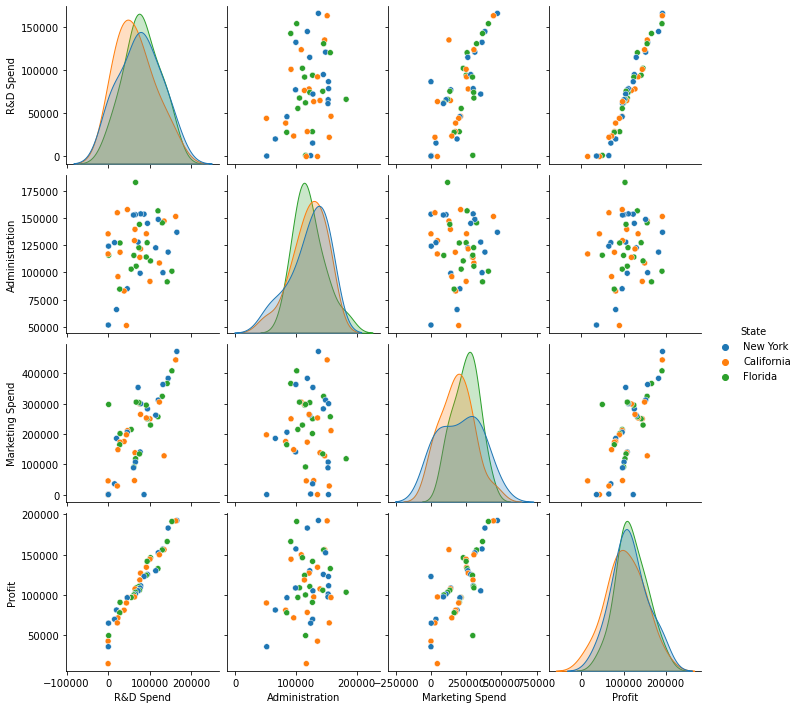

In [25]:
# matrix shows the correlation between variables and the density plot
sns.pairplot(df, hue = 'State')

<AxesSubplot:>

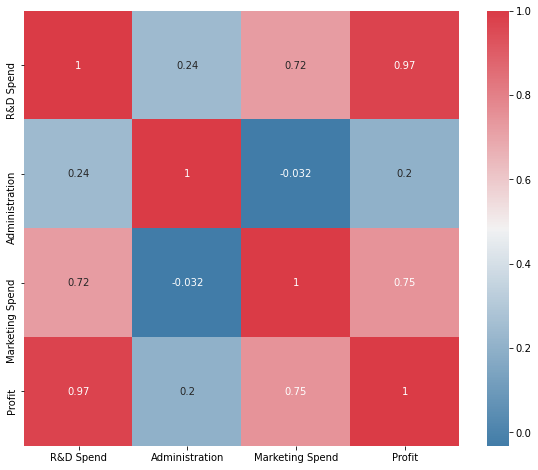

In [26]:
f, ax = plt.subplots(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=np.bool),
           cmap = sns.diverging_palette(240, 10, as_cmap = True), 
           square = True, ax = ax)

# Data preprocessing

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [28]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## OneHotEncoder

In [29]:
df.State.describe()

count           50
unique           3
top       New York
freq            17
Name: State, dtype: object

In [30]:
# encoding the categorical features
df = pd.get_dummies(df, columns=['State'])
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [31]:
df.corr()['Profit'].sort_values()

State_California   -0.145837
State_New York      0.031368
State_Florida       0.116244
Administration      0.200717
Marketing Spend     0.747766
R&D Spend           0.972900
Profit              1.000000
Name: Profit, dtype: float64

<AxesSubplot:>

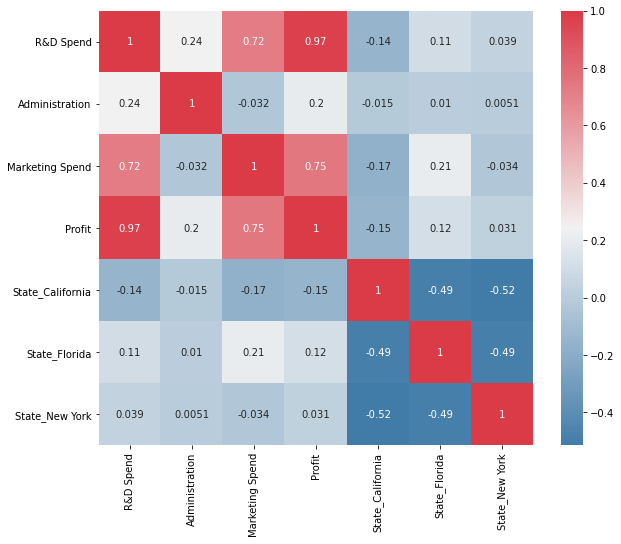

In [32]:
f, ax = plt.subplots(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=np.bool),
           cmap = sns.diverging_palette(240, 10, as_cmap = True), 
           square = True, ax = ax)

## Modeling

We uses scalling

In [33]:
# Normalization of the dataset
std = StandardScaler()
df_std = std.fit_transform(df)
df_std = pd.DataFrame(df_std, columns = df.columns)

In [34]:
X = df_std.drop(['Profit'], axis = 1) # dataset of independent variables
y = df_std.Profit #dependent variable

## Train split test

In [35]:
#splitting into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y
                                                    ,test_size = 6/8
                                                    ,random_state = 120)

In [36]:
from scipy import stats

# printing out the training sets and test sets, the size along with various statistics
print()
print("X_train Dataset Description and values:")
print(stats.describe(X_train))
print("X_train Array shape : " + str(X_train.shape))
#print(X_train)
print()
print("X_test Dataset Description and values:")
print(stats.describe(X_test))
print("X_test Array shape: " + str(X_test.shape))
#print(X_test)
print()
print("y_train Dataset Description and values:")
print(stats.describe(y_train))
#print(y_train)
print()
print("y_test Dataset Description and values:")
print(stats.describe(y_test))
#print(y_test)
print()
print("X_Train and y_train shape:")
print(X_train.shape)
print(y_train.shape)


X_train Dataset Description and values:
DescribeResult(nobs=12, minmax=(array([-1.17717755, -1.99727037, -1.74312698, -0.71774056, -0.68599434,
       -0.71774056]), array([2.01641149, 1.20641936, 2.15394309, 1.39326109, 1.45773797,
       1.39326109])), mean=array([-0.09271446, -0.18355409, -0.20978689, -0.18999015,  0.0285831 ,
        0.16184346]), variance=array([0.72983213, 1.04907528, 1.18695436, 0.91152163, 1.114082  ,
       1.18160212]), skewness=array([ 1.07251991, -0.02661623,  0.60113141,  1.15470054,  0.70710678,
        0.3380617 ]), kurtosis=array([ 1.25506902, -0.89279112, -0.03488538, -0.66666667, -1.5       ,
       -1.88571429]))
X_train Array shape : (12, 6)

X_test Dataset Description and values:
DescribeResult(nobs=38, minmax=(array([-1.62236202, -2.52599402, -1.74312698, -0.71774056, -0.68599434,
       -0.71774056]), array([1.95586034, 2.2101405 , 1.9236004 , 1.39326109, 1.45773797,
       1.39326109])), mean=array([ 0.02927825,  0.05796445,  0.06624849,  0.059

In [37]:
# regressor summary
regressor = sm.OLS(y_train, X_train).fit()
print(regressor.summary())

X_train_dropped = X_train.copy()

                                 OLS Regression Results                                
Dep. Variable:                 Profit   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              60.24
Date:                Thu, 07 Jul 2022   Prob (F-statistic):                    1.33e-05
Time:                        18:26:10   Log-Likelihood:                          8.2401
No. Observations:                  12   AIC:                                     -6.480
Df Residuals:                       7   BIC:                                     -4.056
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

### The function removes features with high p-value

In [38]:
while True:
    if max(regressor.pvalues) > 0.05:
        drop_variable = regressor.pvalues[regressor.pvalues == max(regressor.pvalues)]
        print("Dropping " + drop_variable.index[0] + " and running regression again because pvalue is: " + str(drop_variable[0]))
        X_train_dropped = X_train_dropped.drop(columns = [drop_variable.index[0]])
        regressor = sm.OLS(y_train, X_train_dropped).fit()
    else:
        print("All p values less than 0.05")
        break

Dropping State_Florida and running regression again because pvalue is: 0.8509642642298341
Dropping State_New York and running regression again because pvalue is: 0.8757574682889988
Dropping State_California and running regression again because pvalue is: 0.5888729810953166
Dropping Marketing Spend and running regression again because pvalue is: 0.7183204129431902
Dropping Administration and running regression again because pvalue is: 0.07841596657802424
All p values less than 0.05


In [39]:
# printing regression summary after having drop all the variables with high p-value
print(regressor.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Profit   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              319.2
Date:                Thu, 07 Jul 2022   Prob (F-statistic):                    1.79e-09
Time:                        18:26:11   Log-Likelihood:                          5.9420
No. Observations:                  12   AIC:                                     -9.884
Df Residuals:                      11   BIC:                                     -9.399
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Uses SelectKBest

<AxesSubplot:>

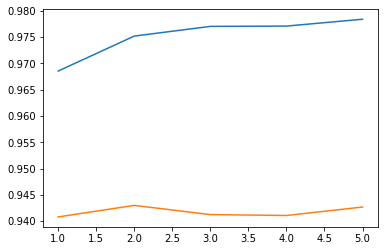

In [40]:
# SelectKBest shows what the best number of feature for the model according to the r-squared value
column_names = df.drop(columns = ['Profit']).columns
no_of_features = []
r_squared_train = []
r_squared_test = []


for k in range(1, 6):
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared_train.append(regressor.score(X_train_transformed, y_train))
    r_squared_test.append(regressor.score(X_test_transformed, y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full')

In [41]:
### Best score k = 1
selector = SelectKBest(f_regression, k = 1)
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
column_names[selector.get_support()]

Index(['R&D Spend'], dtype='object')

In [42]:
def regression_model(model):
    """
    Will fit the regression model passed and will return the regressor object and the score
    """
    regressor = model
    regressor.fit(X_train_transformed, y_train)
    score = regressor.score(X_test_transformed, y_test)
    return regressor, score

In [43]:
# checking which model perform better
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])

models_to_evaluate = [LinearRegression(), Ridge(), Lasso(), SVR(), RandomForestRegressor(), MLPRegressor()]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": round(score,2)}, ignore_index=True)

model_performance

,Features,Model,Score
0,Linear,LinearRegression(),0.94
1,Linear,Ridge(),0.93
2,Linear,Lasso(),-0.00
3,Linear,SVR(),0.69
4,Linear,"(DecisionTreeRegressor(max_features='auto', ra...",0.83
5,Linear,MLPRegressor(),0.91


In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train_transformed, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test_transformed)

# Eveluation metrics
print("__ \n")
print('Coefficients: \n', regr.coef_)
print("__ \n")
print('Intercept: \n', regr.intercept_)
print("__ \n")
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print("__ \n")

# The coefficient of determination: 1 is perfect prediction
print('R-Squared: %.2f'
      % r2_score(y_test, y_pred))
print("__ \n")

print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("__\n")

__ 

Coefficients: 
 [0.97007809]
__ 

Intercept: 
 0.03648358766432768
__ 

Mean squared error: 0.07
__ 

R-Squared: 0.94
__ 

MAE: 0.20
__

